# 3D Speckle Generation & Analysis

**Scott Prahl**

**September 2023**

Adapted from the SimSpeckle Matlab script package described in Donald D. Duncan, Sean J. Kirkpatrick, "Algorithms for simulation of speckle (laser and otherwise)," Proc. SPIE 6855, Complex Dynamics and Fluctuations in Biomedical Photonics V, 685505 (6 February 2008); <https://doi.org/10.1117/12.760518>

A PDF is available at
<https://www.researchgate.net/profile/Sean-Kirkpatrick-2/publication/233783056_Algorithms_for_simulation_of_speckle_laser_and_otherwise/links/09e4150b78c4e8fe5f000000/Algorithms-for-simulation-of-speckle-laser-and-otherwise.pdf>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyspeckle

%config InlineBackend.figure_format='retina'

## Create simple 3D speckle image

Generate an 25 x 25 x 25 polarized, fully-developed speckle irradiance pattern.

The speckle pattern will have an exponential probability distribution
function that is spatially bandwidth-limited by the specified pixels per
speckle.

The resolution is specified by the parameter `pix_per_speckle` and refers
to the smallest speckle size.  Thus `pix_per_speckle=5` will have five pixels across
the smallest speckle.

Non-circular speckle is supported using `alpha` and `beta`.  This is defined
as the ratio of x-speckle size to y-speckle size (or x to z).  `alpha=2` will 
have speckles that with y-dimensions that are twice the x-dimension.  Similarly
`beta=2` will have speckles that with z-dimensions that are twice the x-dimension.

In [2]:
x = pyspeckle.create_Exponential_3D(25, 5, alpha=2, beta=2)
y = np.sqrt(x)

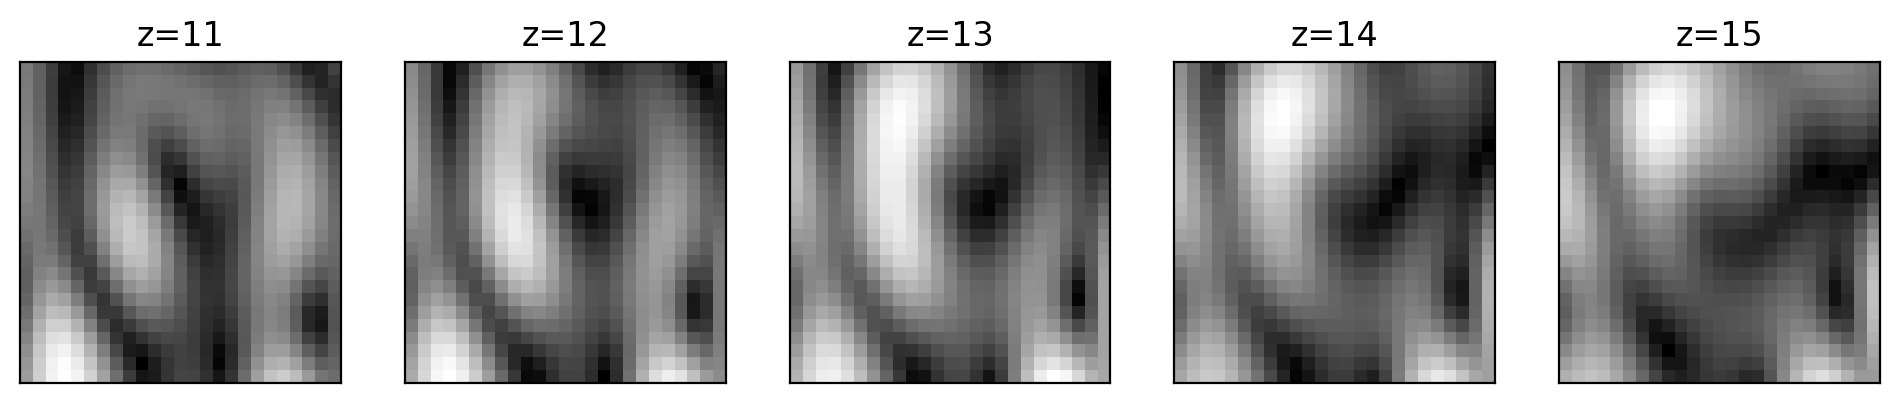

In [3]:
def showone(i):
    plt.subplot(1, 5, i)
    j = 10 + i
    plt.imshow(y[:, :, j], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("z=%i" % j)


plt.subplots(1, 5, figsize=(12, 4))
for i in range(1, 6):
    showone(i)
plt.show()

<Figure size 1000x1000 with 0 Axes>

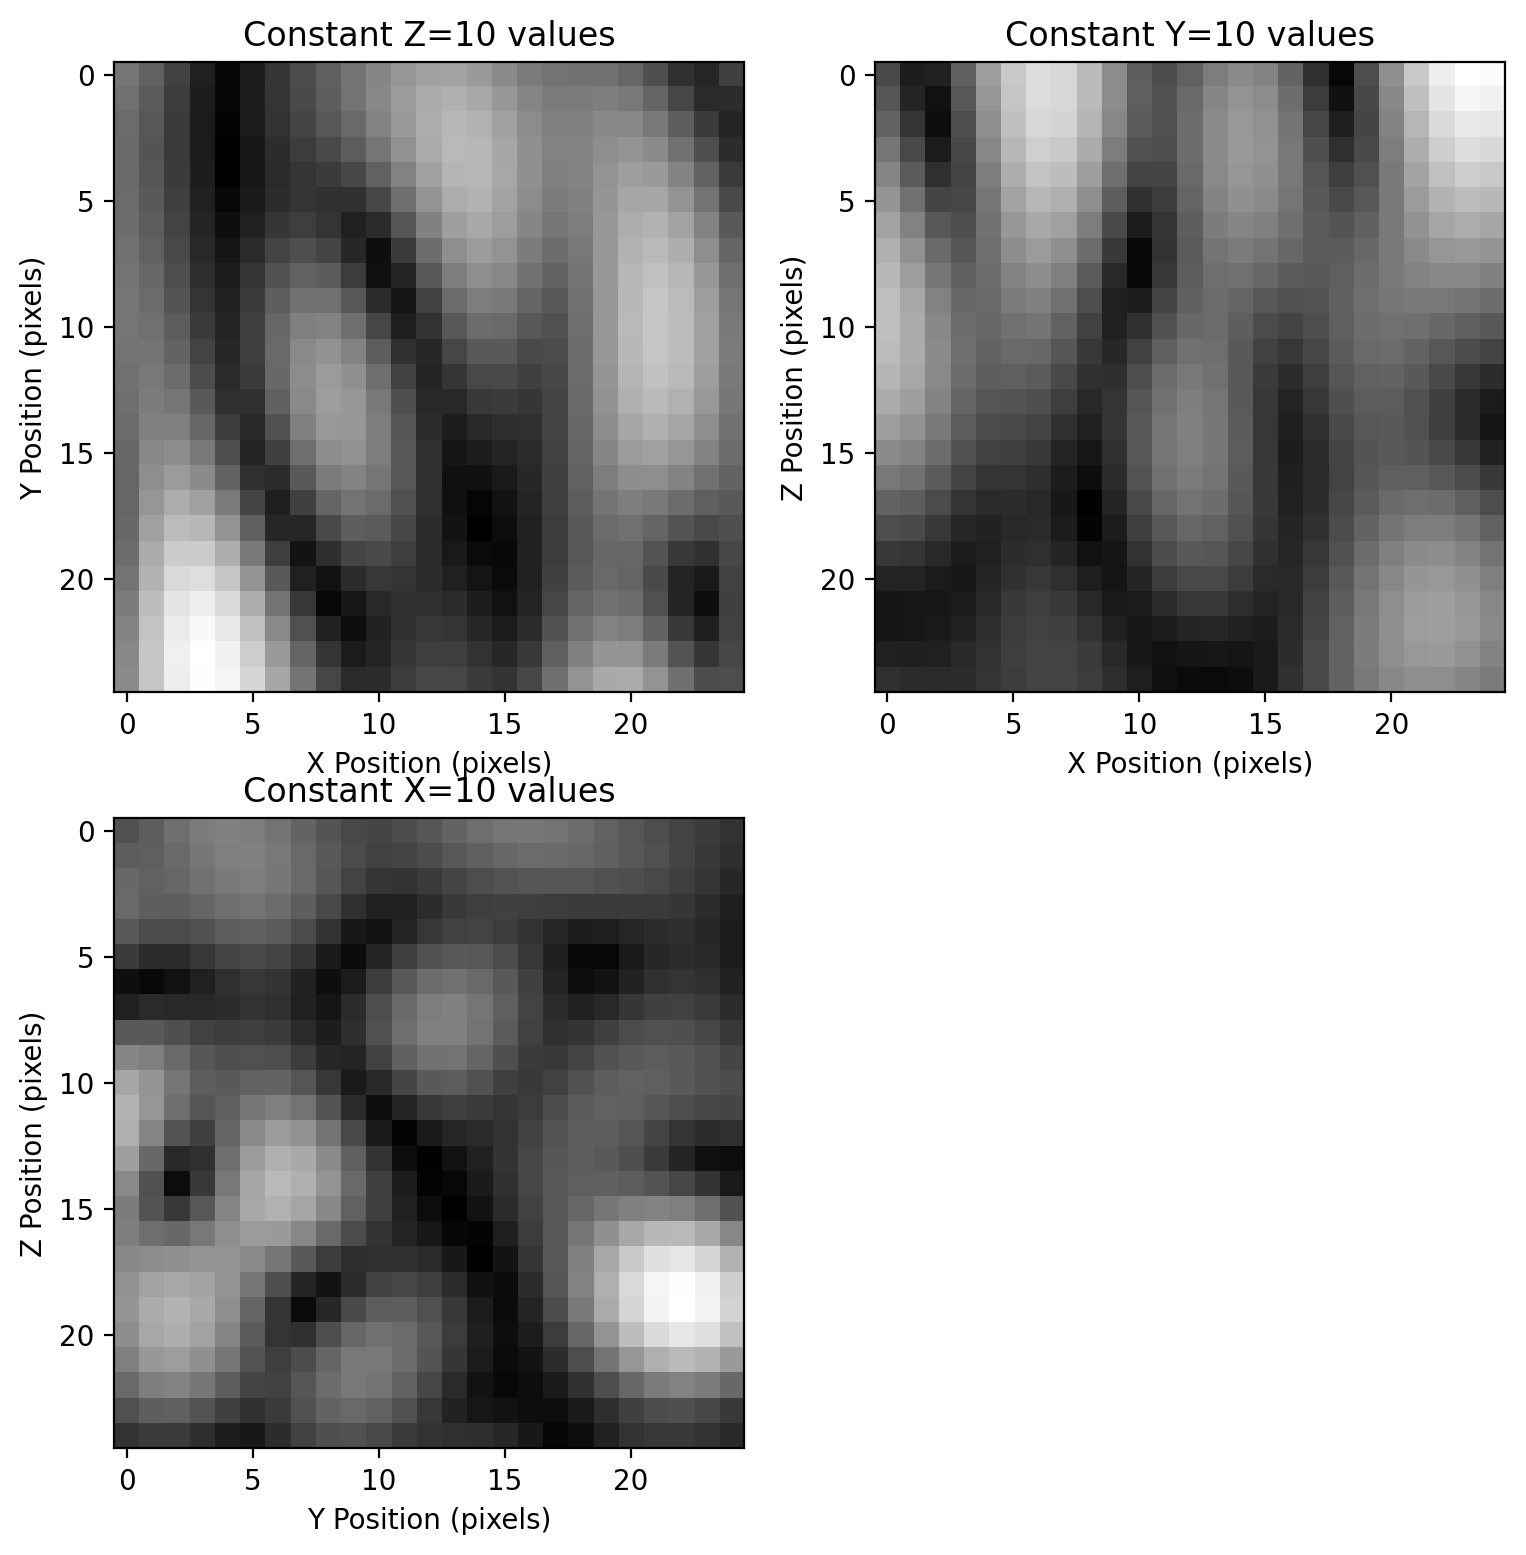

In [5]:
plt.figure(figsize=(10, 10))
pyspeckle.slice_plot(x, 10, 10, 10)
plt.show()

## Unpolarized (Rayleigh) Speckle

In [6]:
x = pyspeckle.create_Exponential_3D(100, 2, alpha=0.3, polarization=0.0)
y = np.sqrt(x)

and look at the statistics for a slice of the cube for z=50

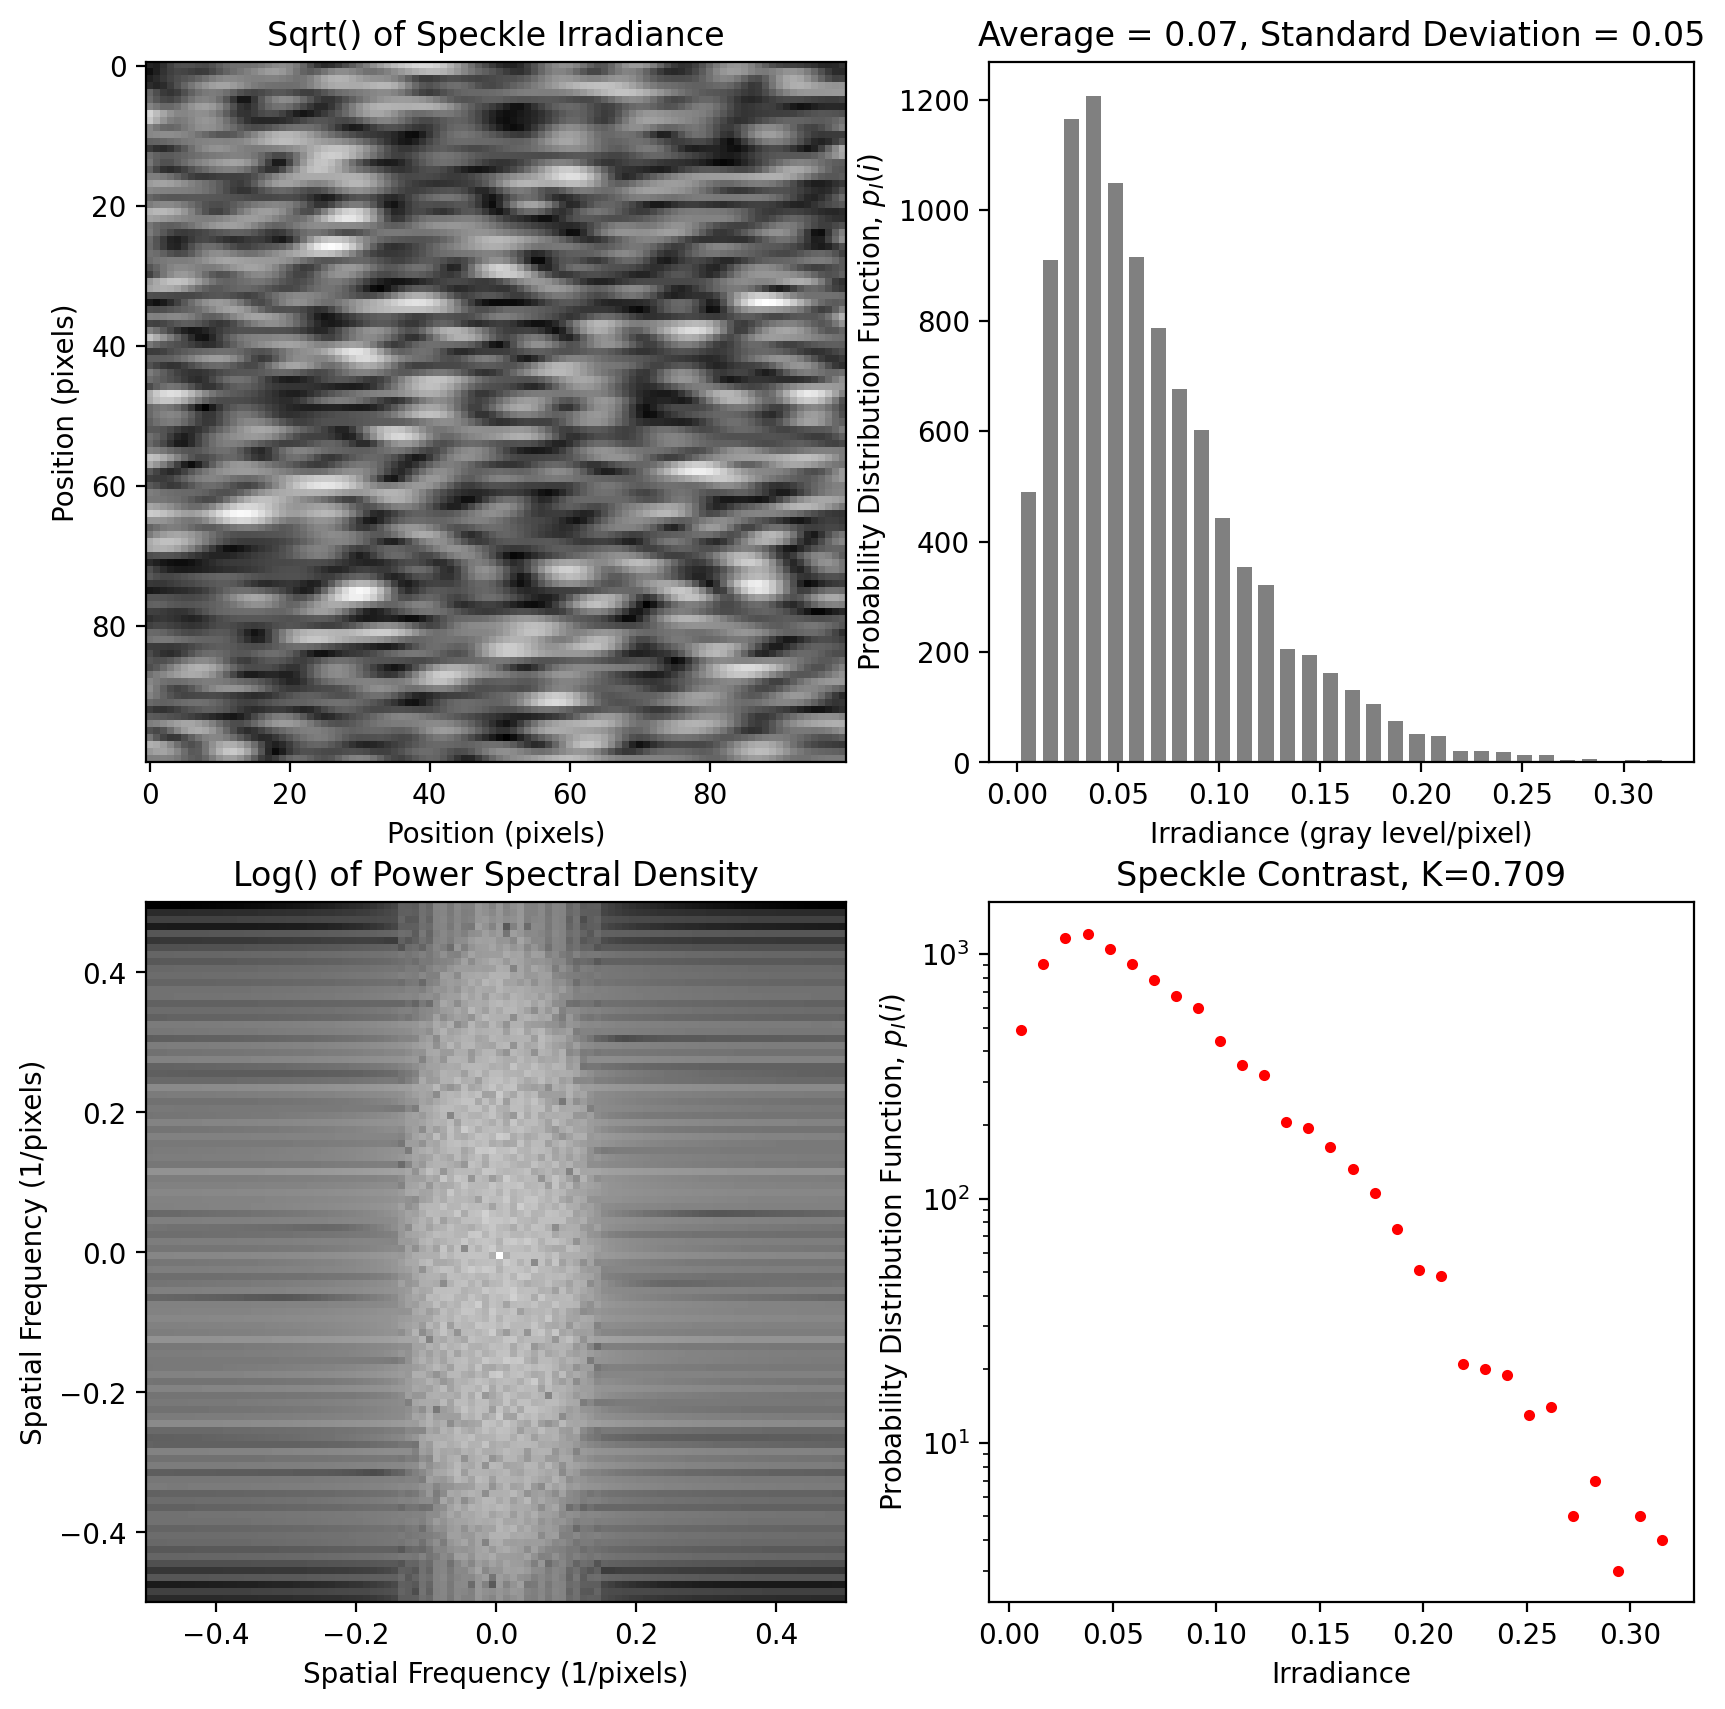

In [7]:
plt.figure(figsize=(10, 10))
pyspeckle.statistics_plot(x[:, :, 50], initialize=False)
plt.show()